# Laboratory #02 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques
---


In [14]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 
from skimage import data

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

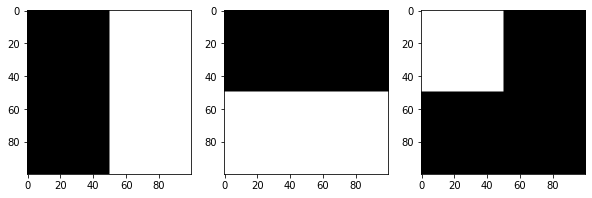

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


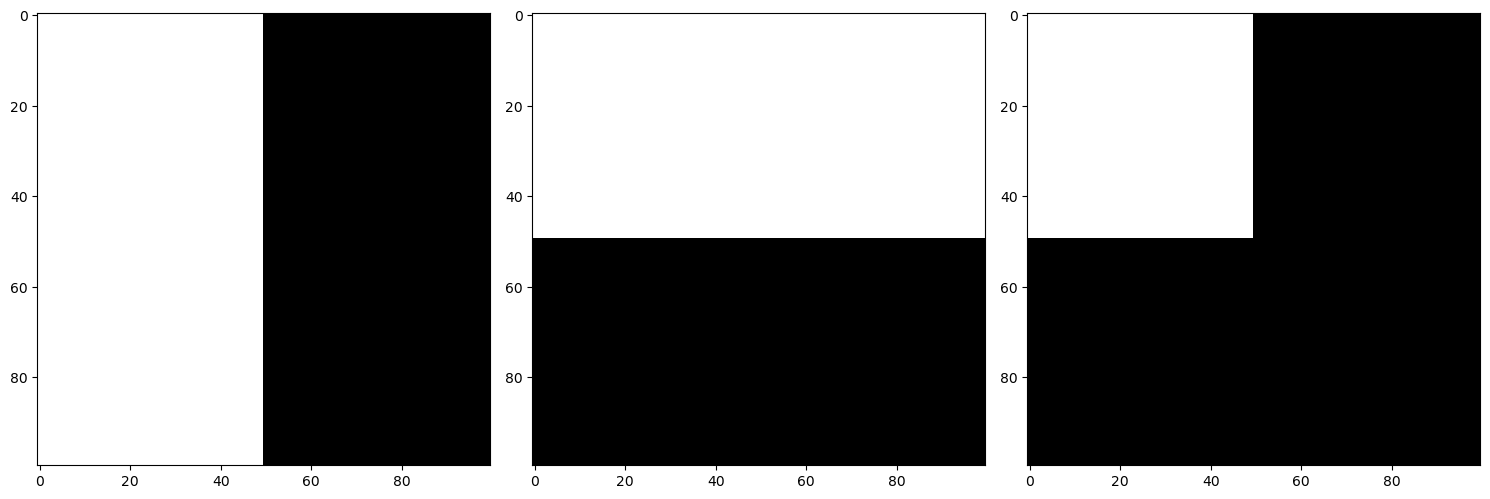

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Create the first image (right half black)
width, height = 100, 100
image_array1 = np.ones((height, width, 3), dtype=np.uint8) * 255  # Start with a white image
dividing_line = width // 2
image_array1[:, dividing_line:] = [0, 0, 0]  # Set the right half to black
image1 = Image.fromarray(image_array1)

# Create the second image (bottom half black)
image_array2 = np.ones((height, width, 3), dtype=np.uint8) * 255  # Start with a white image
dividing_line = height // 2
image_array2[dividing_line:, :] = [0, 0, 0]  # Set the bottom half to black
image2 = Image.fromarray(image_array2)

# Create the third image (top-left 50x50 section white)
image_array3 = np.zeros((height, width, 3), dtype=np.uint8)  # Start with a black image
image_array3[:50, :50] = [255, 255, 255]  # Set the top-left 50x50 section to white
image3 = Image.fromarray(image_array3)

# Display the images in a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image1)
axes[1].imshow(image2)
axes[2].imshow(image3)


plt.tight_layout()
plt.show()



*   Use the above three images to create the following image

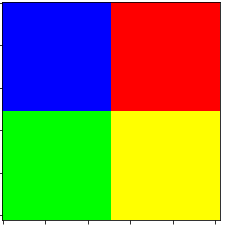
*Hint: Remember channels and color spaces*

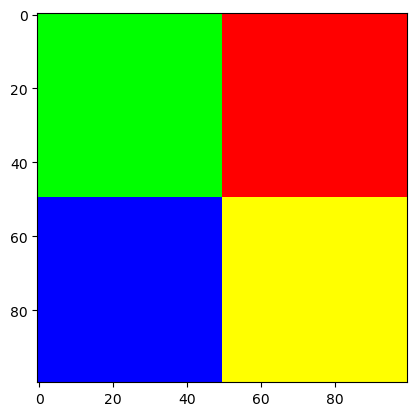

In [5]:
# solution

# Create an array representing the image
width, height = 100, 100
image_array = np.zeros((height, width, 3), dtype=np.uint8)  # Start with a black image

# Define the four quadrants and set colors
half_width = width // 2
half_height = height // 2

# Top-left quadrant (green)
image_array[:half_height, :half_width] = [0, 255, 0]  # Green

# Top-right quadrant (red)
image_array[:half_height, half_width:] = [255, 0, 0]  # Red

# Bottom-left quadrant (blue)
image_array[half_height:, :half_width] = [0, 0, 255]  # Blue

# Bottom-right quadrant (yellow)
image_array[half_height:, half_width:] = [255, 255, 0]  # Yellow

# Convert array to an image
image = Image.fromarray(image_array)

# Display the image in the Jupyter notebook with labeled axes
plt.imshow(image)
plt.show()



### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

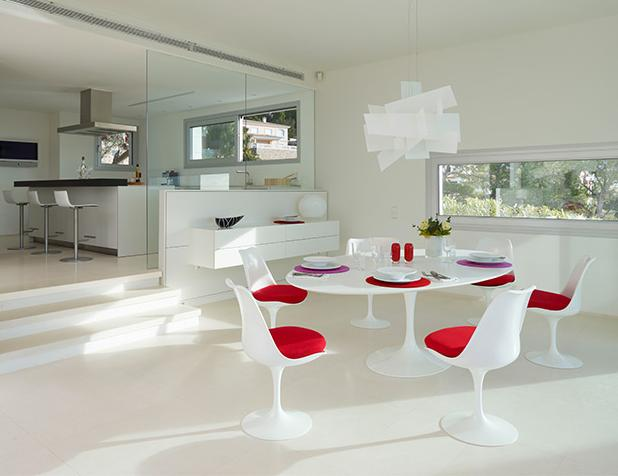

*   Extract individual channels and plot them using matplotlib subplot.



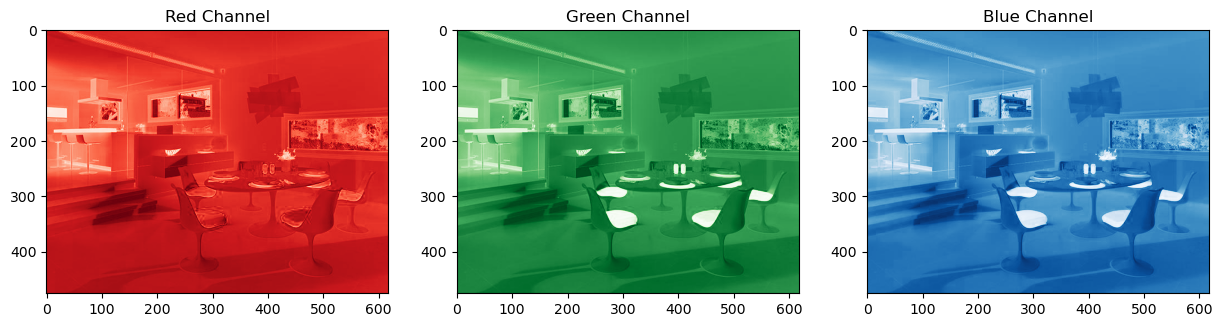

In [4]:
# solution
image = io.imread('sillas.jpg')

# Extract individual channels and plot them using matplotlib subplot
red_channel = image[..., 0]
green_channel = image[..., 1]
blue_channel = image[..., 2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title('Red Channel')
axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title('Green Channel')
axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title('Blue Channel')
plt.show()



*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

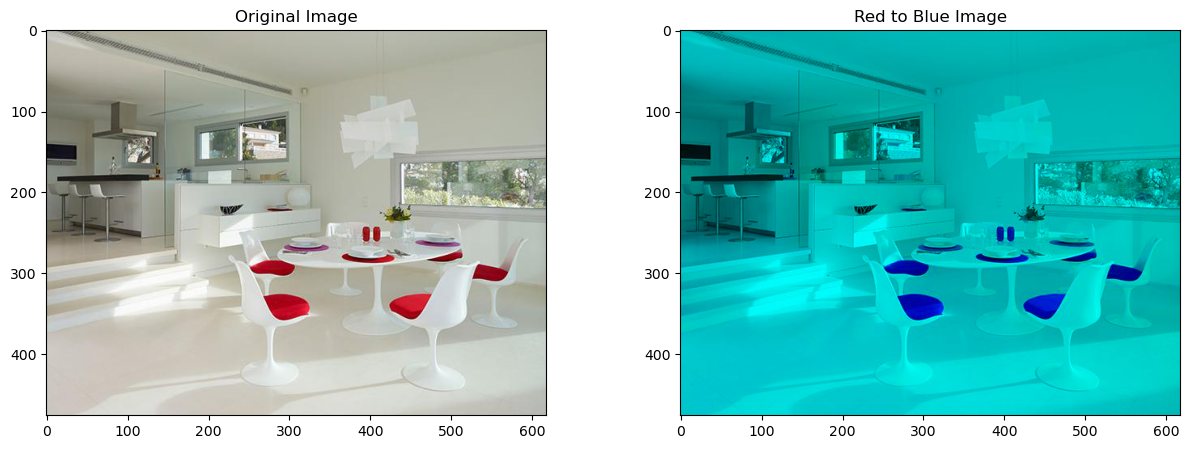

In [5]:
# solution
# Create a new image where everything that is 'red' is changed to 'blue'
new_image = image.copy()
new_image[..., 0] = 0  # Set red channel to 0
new_image[..., 2] = red_channel  # Set blue channel to the original red channel

# Visualize the original image and the created image using matplotlib subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(new_image)
axes[1].set_title('Red to Blue Image')
plt.show()



# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

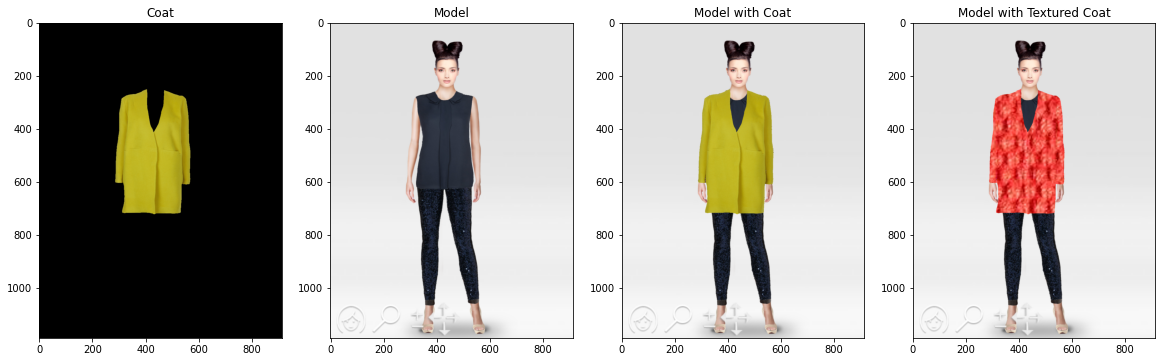

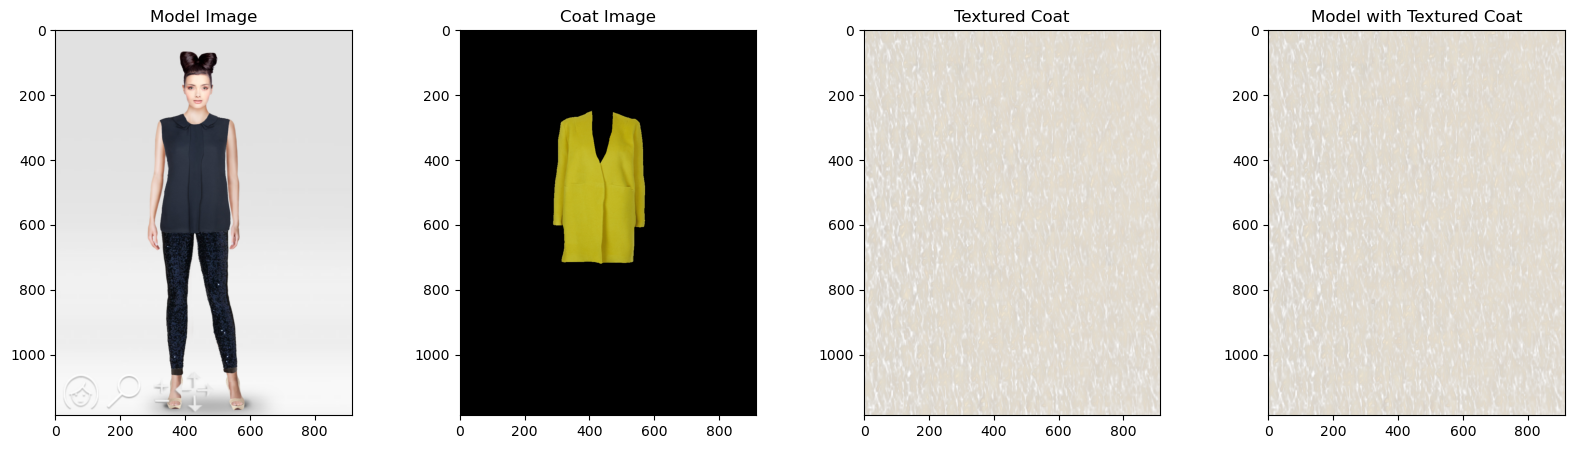

In [9]:

# Load images
model_image = io.imread('model.png')
coat_image = io.imread('coat.png')
texture_image = io.imread('texture.png')

# Resize coat and texture images to match the model image dimensions if necessary
if model_image.shape != coat_image.shape:
    coat_image = transform.resize(coat_image, model_image.shape, anti_aliasing=True, preserve_range=True).astype(np.uint8)
if model_image.shape != texture_image.shape:
    texture_image = transform.resize(texture_image, model_image.shape, anti_aliasing=True, preserve_range=True).astype(np.uint8)

# Create a mask from the coat image 
mask = coat_image[..., 3] > 0  
# Apply the texture to the coat
textured_coat = coat_image.copy()
textured_coat[mask] = texture_image[mask]

# Overlay the textured coat onto the model image using the mask
result_with_texture = model_image.copy()
result_with_texture[mask] = textured_coat[mask]

# Visualize the images
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(model_image)
axes[0].set_title('Model Image')
axes[1].imshow(coat_image)
axes[1].set_title('Coat Image')
axes[2].imshow(textured_coat)
axes[2].set_title('Textured Coat')
axes[3].imshow(result_with_texture)
axes[3].set_title('Model with Textured Coat')
plt.show()




# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




In [21]:
data.astronaut()
image = data.astronaut()



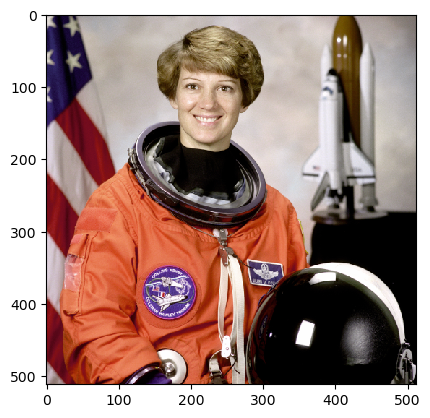

In [22]:
from matplotlib import pyplot as plt
plt.imshow(image, interpolation='nearest')
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

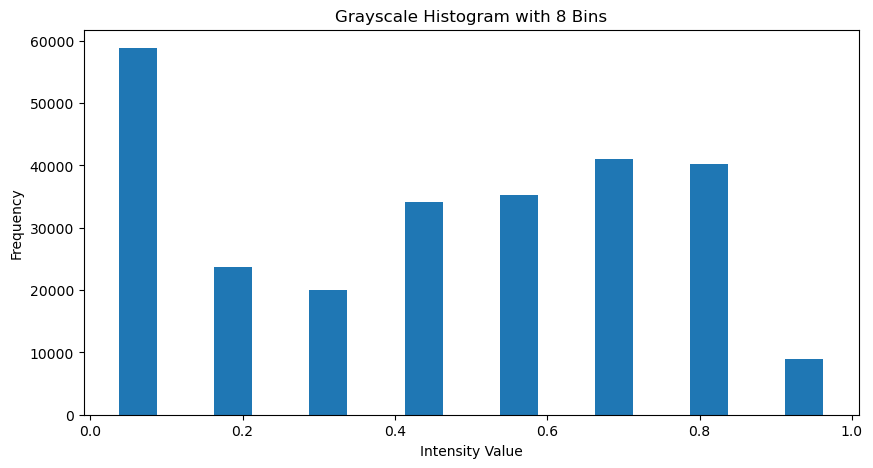

In [1]:
# solution
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, color

# Load the astronaut image from the data module
astronaut_image = data.astronaut()

# Convert the image to grayscale
gray_image = color.rgb2gray(astronaut_image)

# Compute the histogram of the grayscale image with 8 bins
hist_8, hist_centers_8 = exposure.histogram(gray_image, nbins=8)

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.bar(hist_centers_8, hist_8, width=0.05, align='center')
plt.title('Grayscale Histogram with 8 Bins')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()





*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

When you change the bin count in a histogram, it affects the granularity and the representation of the intensity distribution of the image.


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


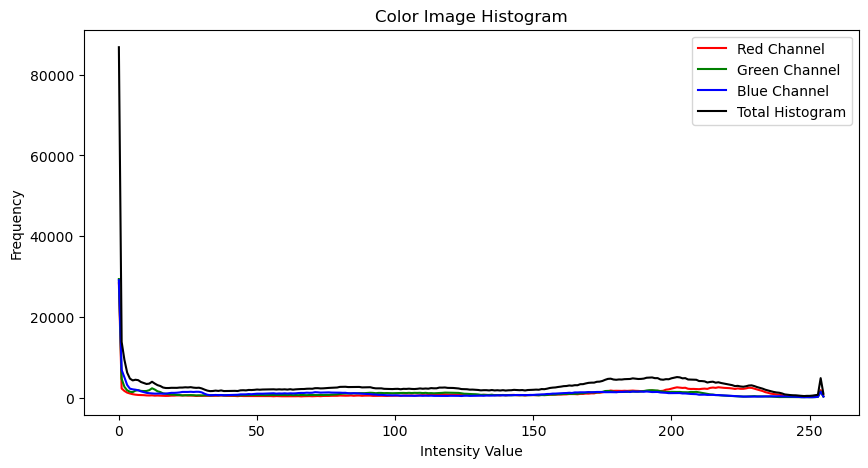

In [2]:
#solution
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure

# Load the astronaut image from the data module
astronaut_image = data.astronaut()

# Compute histograms for each color channel
hist_r, hist_centers_r = exposure.histogram(astronaut_image[..., 0])
hist_g, hist_centers_g = exposure.histogram(astronaut_image[..., 1])
hist_b, hist_centers_b = exposure.histogram(astronaut_image[..., 2])

# Compute the total histogram by summing the individual channel histograms
hist_total = hist_r + hist_g + hist_b
hist_centers_total = hist_centers_r  # All centers are the same

# Plot the histograms
plt.figure(figsize=(10, 5))
plt.plot(hist_centers_r, hist_r, 'r', label='Red Channel')
plt.plot(hist_centers_g, hist_g, 'g', label='Green Channel')
plt.plot(hist_centers_b, hist_b, 'b', label='Blue Channel')
plt.plot(hist_centers_total, hist_total, 'k', label='Total Histogram')
plt.title('Color Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()



### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



/opt/anaconda3/lib/python3.11/site-packages/skimage/_shared/utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


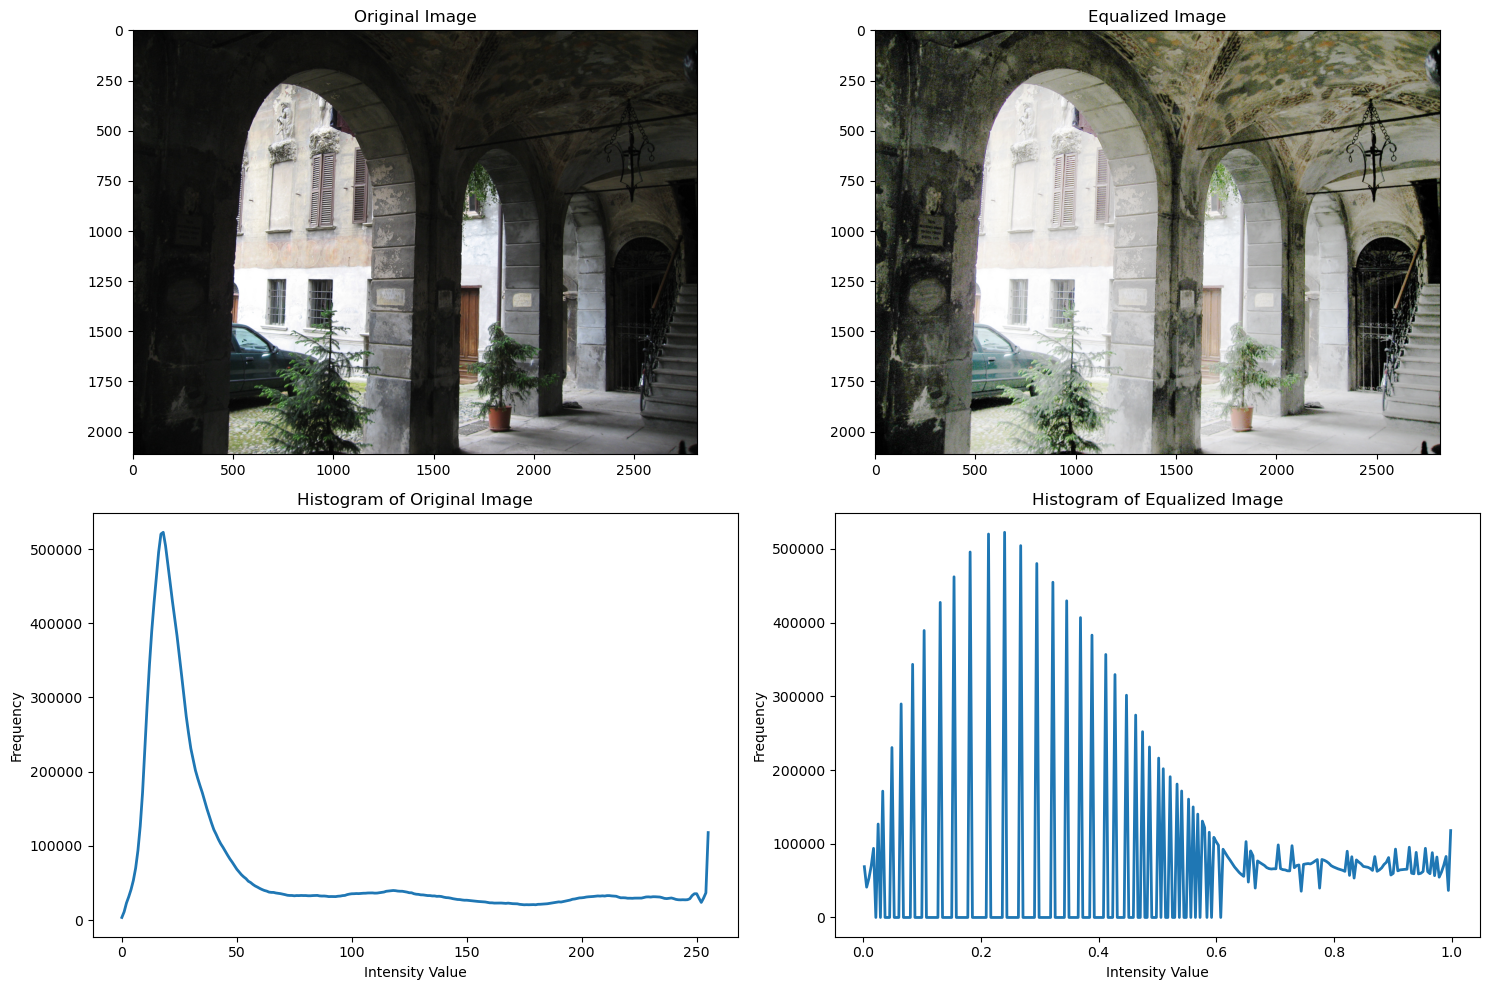

In [4]:
# solution

# Read the 'aquatermi_lowcontrast.jpg' image from the images folder
image = io.imread('aquatermi_lowcontrast.jpg')

# Compute the histogram of the original image
hist_orig, hist_centers_orig = exposure.histogram(image)

# Perform histogram equalization to enhance the contrast
equalized_image = exposure.equalize_hist(image)

# Compute the histogram of the equalized image
hist_eq, hist_centers_eq = exposure.histogram(equalized_image)

# Create a 2x2 subplot to show the original image and the enhanced image along with the corresponding histograms
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Display original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')

# Display histogram of original image
axes[1, 0].plot(hist_centers_orig, hist_orig, lw=2)
axes[1, 0].set_title('Histogram of Original Image')
axes[1, 0].set_xlabel('Intensity Value')
axes[1, 0].set_ylabel('Frequency')

# Display equalized image
axes[0, 1].imshow(equalized_image, cmap='gray')
axes[0, 1].set_title('Equalized Image')

# Display histogram of equalized image
axes[1, 1].plot(hist_centers_eq, hist_eq, lw=2)
axes[1, 1].set_title('Histogram of Equalized Image')
axes[1, 1].set_xlabel('Intensity Value')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()




*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*


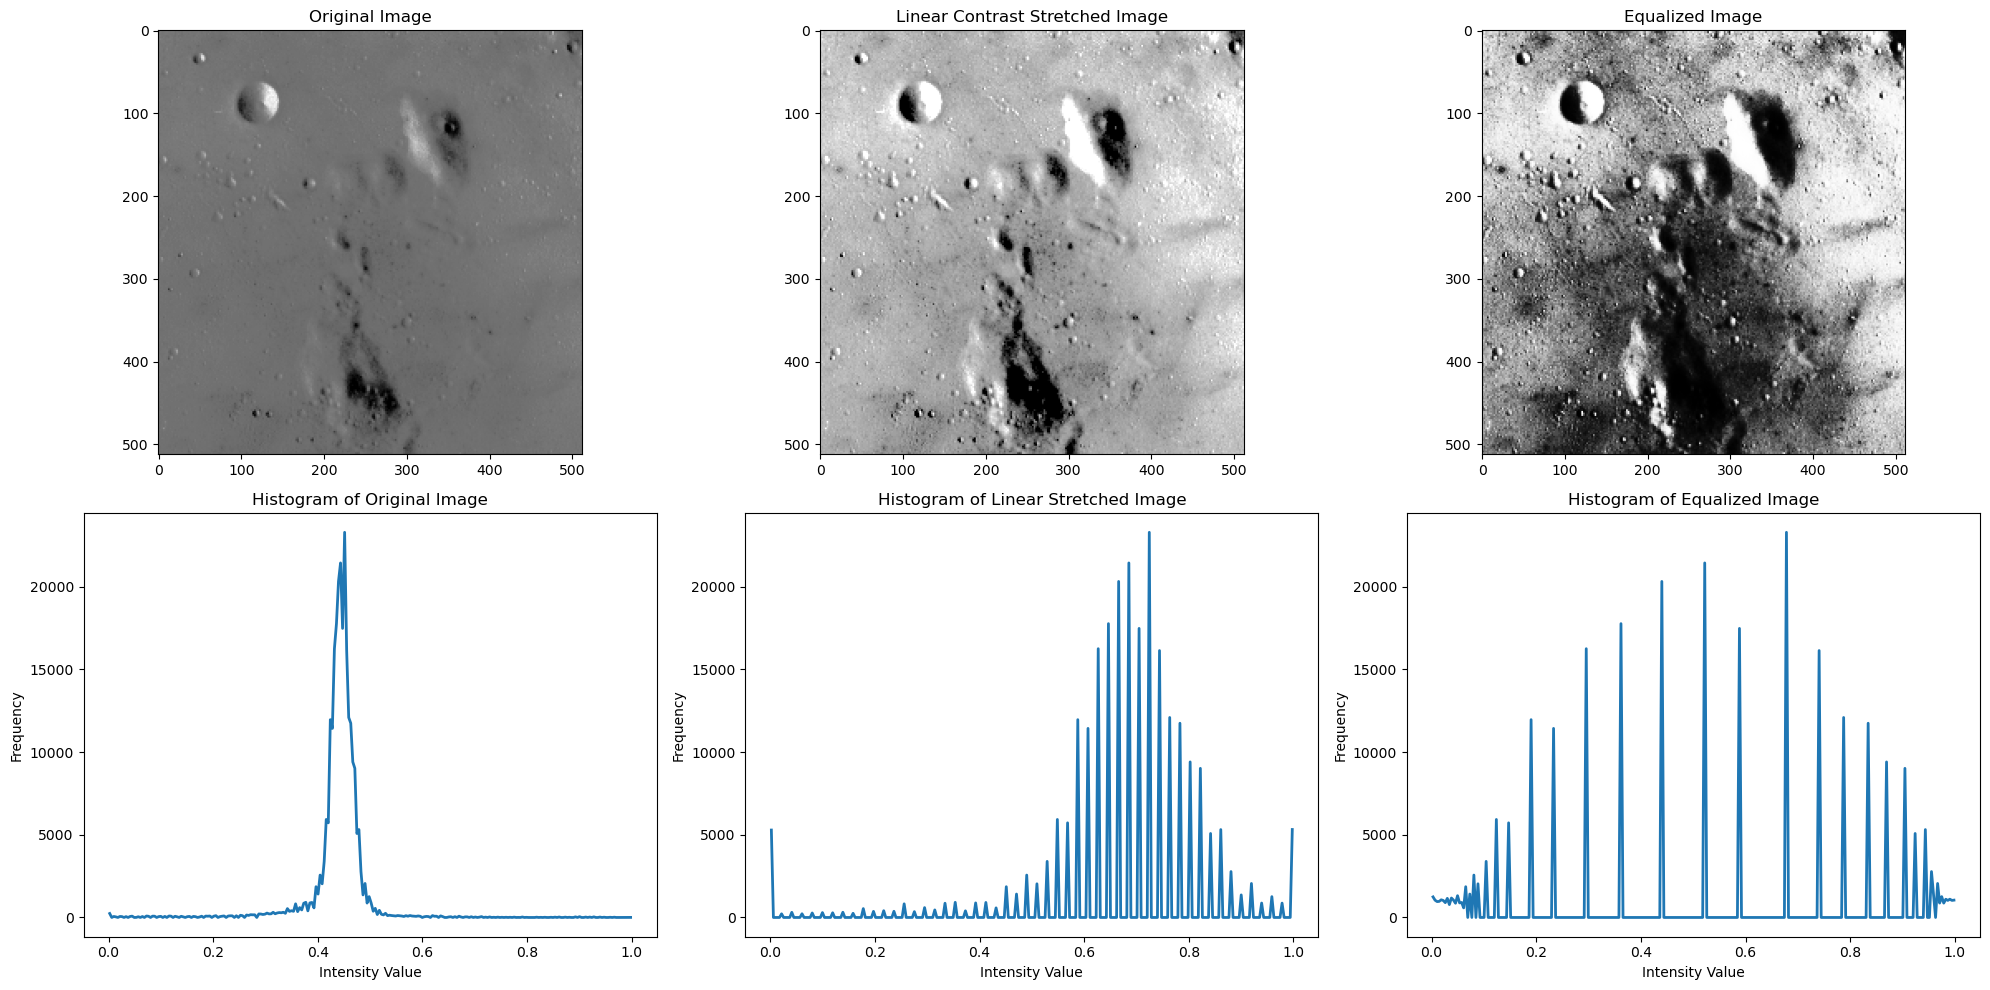

In [5]:
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, img_as_float

# Load a low-contrast image from skimage.data
image = data.moon()
image = img_as_float(image)

# Linear Contrast Stretching function
def linear_contrast_stretch(image):
    p2, p98 = np.percentile(image, (2, 98))
    return exposure.rescale_intensity(image, in_range=(p2, p98))

# Perform linear contrast stretching
linear_stretched_image = linear_contrast_stretch(image)

# Perform histogram equalization to enhance the contrast
equalized_image = exposure.equalize_hist(image)

# Compute histograms of the images
hist_orig, hist_centers_orig = exposure.histogram(image)
hist_linear, hist_centers_linear = exposure.histogram(linear_stretched_image)
hist_eq, hist_centers_eq = exposure.histogram(equalized_image)

# Create a 2x3 subplot to show the original image, the enhanced images, and their corresponding histograms
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Display original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')

# Display histogram of original image
axes[1, 0].plot(hist_centers_orig, hist_orig, lw=2)
axes[1, 0].set_title('Histogram of Original Image')
axes[1, 0].set_xlabel('Intensity Value')
axes[1, 0].set_ylabel('Frequency')

# Display linear contrast stretched image
axes[0, 1].imshow(linear_stretched_image, cmap='gray')
axes[0, 1].set_title('Linear Contrast Stretched Image')

# Display histogram of linear contrast stretched image
axes[1, 1].plot(hist_centers_linear, hist_linear, lw=2)
axes[1, 1].set_title('Histogram of Linear Stretched Image')
axes[1, 1].set_xlabel('Intensity Value')
axes[1, 1].set_ylabel('Frequency')

# Display equalized image
axes[0, 2].imshow(equalized_image, cmap='gray')
axes[0, 2].set_title('Equalized Image')

# Display histogram of equalized image
axes[1, 2].plot(hist_centers_eq, hist_eq, lw=2)
axes[1, 2].set_title('Histogram of Equalized Image')
axes[1, 2].set_xlabel('Intensity Value')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



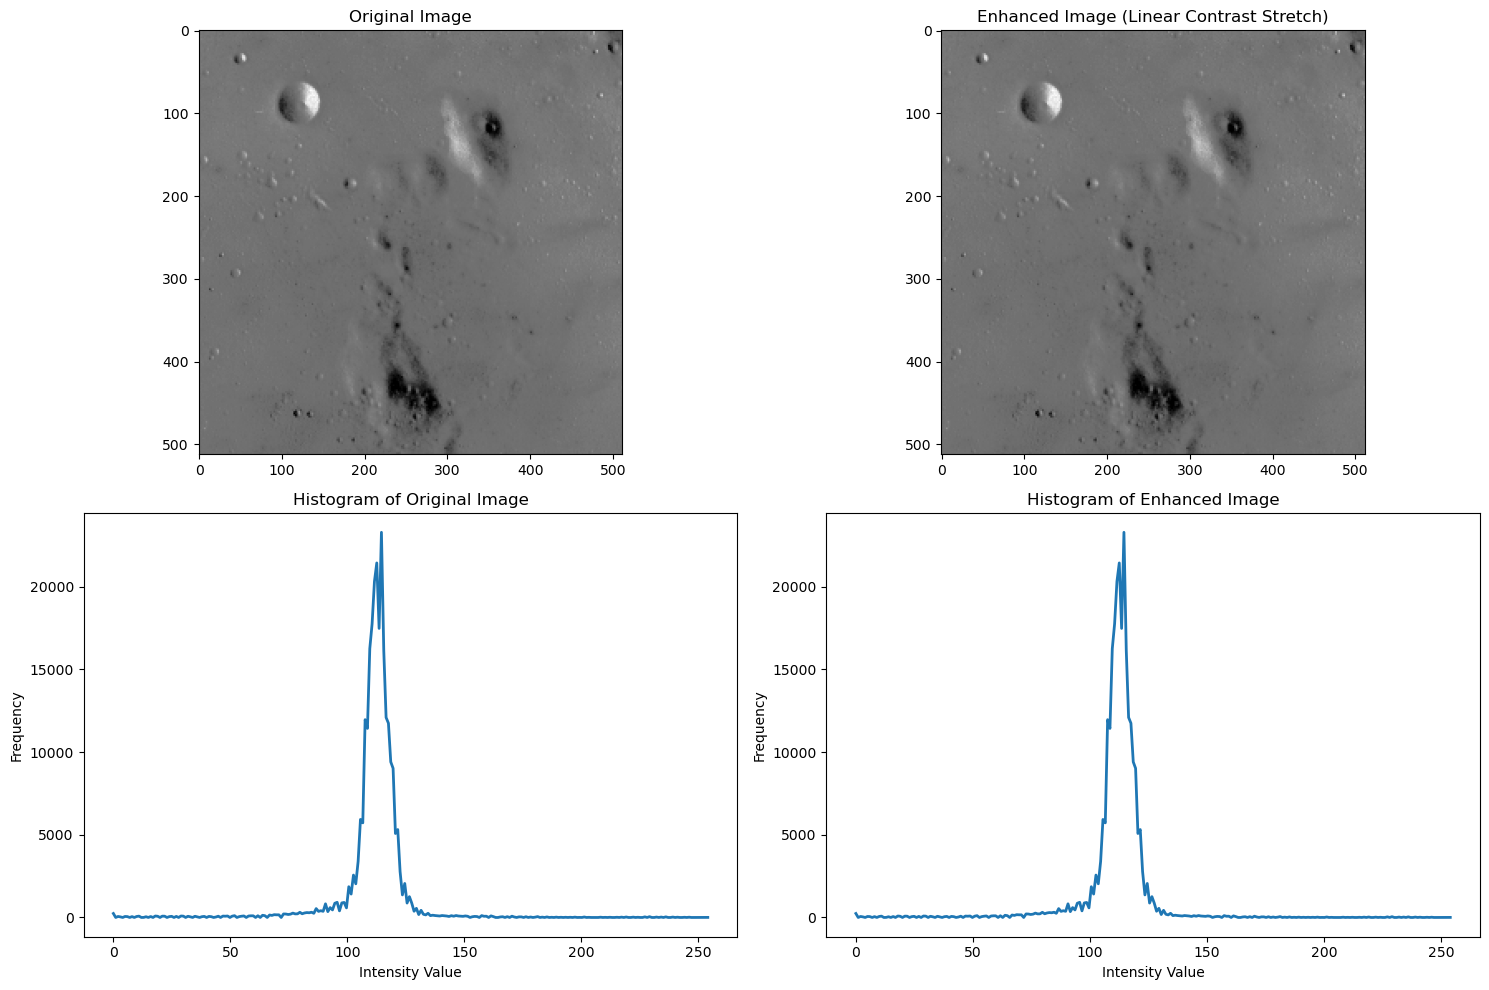

In [6]:
# solution
import numpy as np
from matplotlib import pyplot as plt

def linear_contrast_stretch(image, bin_count=256):
    # Find the minimum and maximum intensity values in the image
    min_val = np.min(image)
    max_val = np.max(image)
    
    # Apply the linear contrast stretch formula
    stretched_image = (image - min_val) / (max_val - min_val)
    stretched_image = (stretched_image * 255).astype(np.uint8)
    
    return stretched_image

def plot_histogram(image, ax, bins=256):
    # Compute histogram
    hist, bin_edges = np.histogram(image, bins=bins, range=(0, 255))
    
    # Plot histogram
    ax.plot(bin_edges[0:-1], hist, lw=2)
    ax.set_xlabel('Intensity Value')
    ax.set_ylabel('Frequency')

# Load a grayscale image
image = data.moon()

# Perform linear contrast stretching
stretched_image = linear_contrast_stretch(image)

# Create a 2x2 subplot to visualize the original image, histogram, enhanced image, and the corresponding histogram
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Display original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')

# Display histogram of original image
plot_histogram(image, axes[1, 0], bins=256)
axes[1, 0].set_title('Histogram of Original Image')

# Display enhanced image
axes[0, 1].imshow(stretched_image, cmap='gray')
axes[0, 1].set_title('Enhanced Image (Linear Contrast Stretch)')

# Display histogram of enhanced image
plot_histogram(stretched_image, axes[1, 1], bins=256)
axes[1, 1].set_title('Histogram of Enhanced Image')

plt.tight_layout()
plt.show()



# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




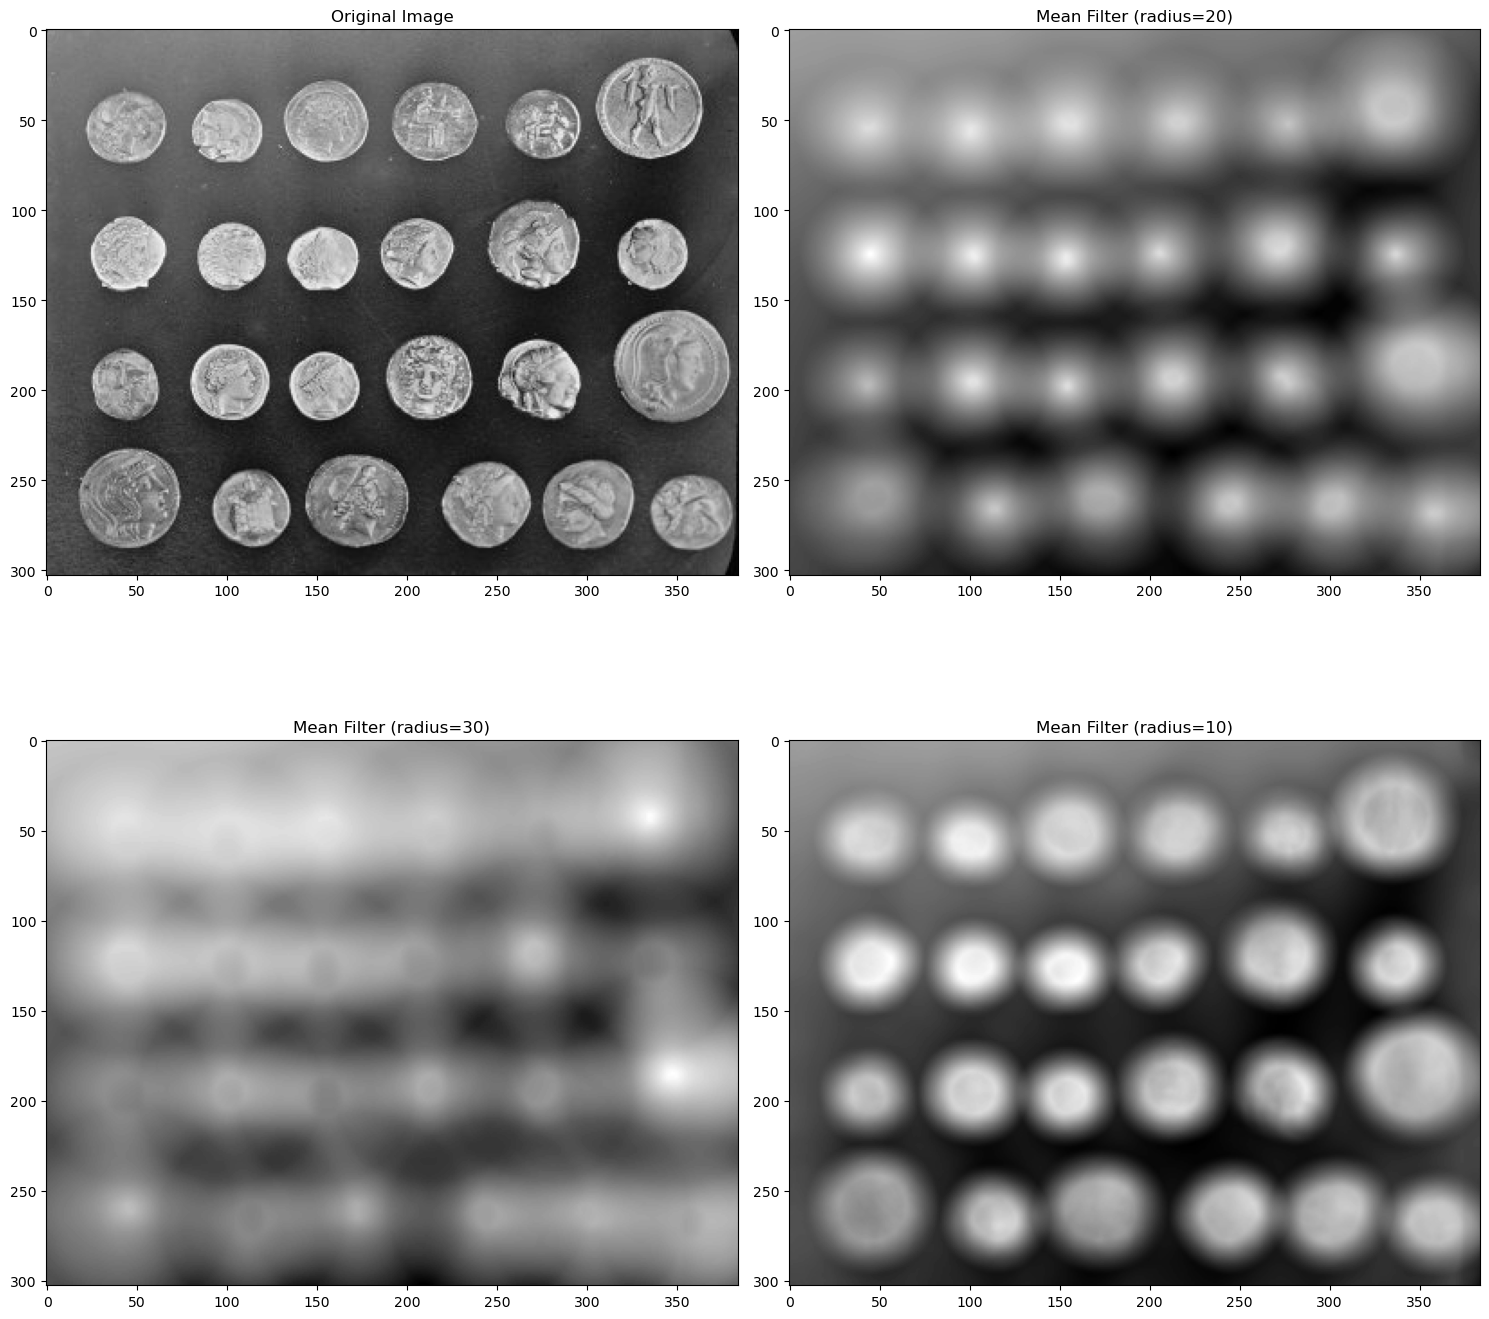

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, filters, morphology, img_as_ubyte

# Load the coins image from the data module
coins_image = data.coins()

# Ensure the image is in the correct format (uint8)
coins_image = img_as_ubyte(coins_image)

# Define a function to apply the mean filter with different radii
def apply_mean_filter(image, radius):
    footprint = morphology.disk(radius)
    filtered_image = filters.rank.mean(image, footprint=footprint)
    return filtered_image

# Apply the mean filter with different radii
radius_20 = 20
radius_30 = 30
radius_10 = 10

filtered_image_20 = apply_mean_filter(coins_image, radius_20)
filtered_image_30 = apply_mean_filter(coins_image, radius_30)
filtered_image_10 = apply_mean_filter(coins_image, radius_10)

# Create a 2x2 subplot to visualize the original image and the smoothened images
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Display original image
axes[0, 0].imshow(coins_image, cmap='gray')
axes[0, 0].set_title('Original Image')

# Display smoothened image with radius 20
axes[0, 1].imshow(filtered_image_20, cmap='gray')
axes[0, 1].set_title('Mean Filter (radius=20)')

# Display smoothened image with radius 30
axes[1, 0].imshow(filtered_image_30, cmap='gray')
axes[1, 0].set_title('Mean Filter (radius=30)')

# Display smoothened image with radius 10
axes[1, 1].imshow(filtered_image_10, cmap='gray')
axes[1, 1].set_title('Mean Filter (radius=10)')

plt.tight_layout()
plt.show()




*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

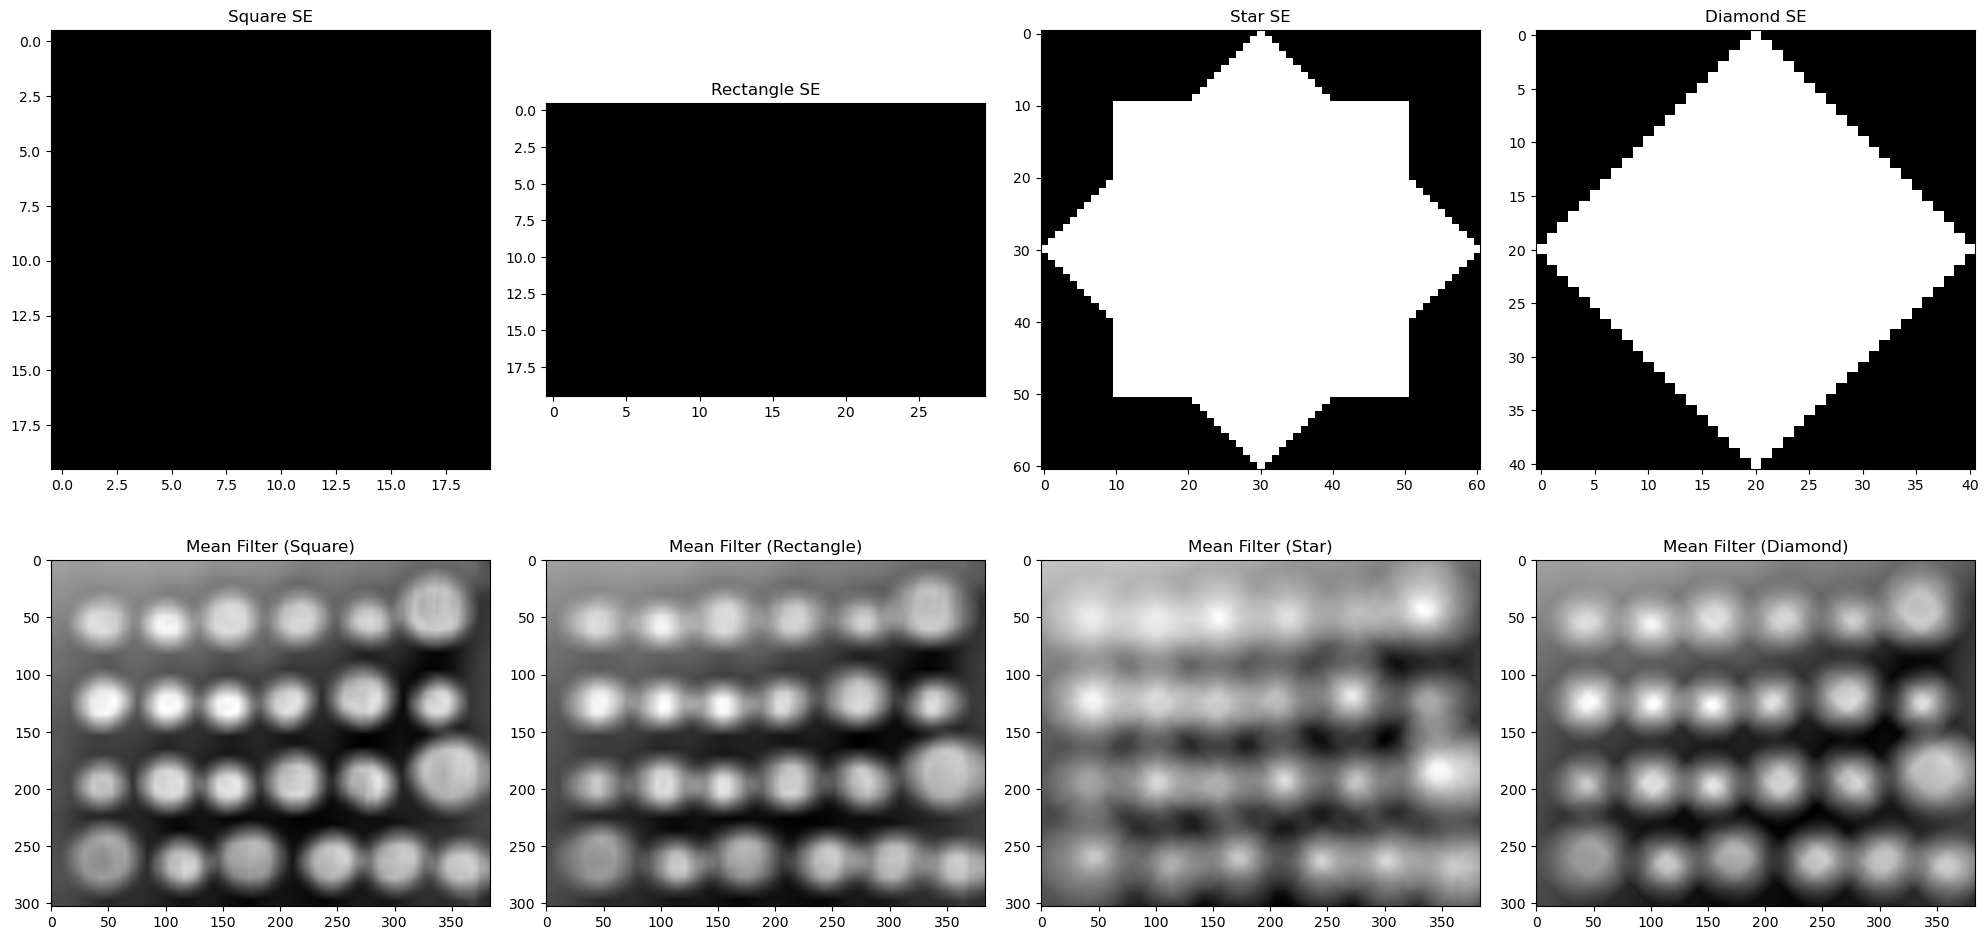

In [10]:
# solution
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, filters, morphology, img_as_ubyte

# Load the coins image from the data module
coins_image = data.coins()

# Ensure the image is in the correct format (uint8)
coins_image = img_as_ubyte(coins_image)

# Define a function to apply the mean filter with different structuring elements
def apply_mean_filter(image, selem):
    filtered_image = filters.rank.mean(image, footprint=selem)
    return filtered_image

# Define different structuring elements
selem_square = morphology.square(20)
selem_rectangle = morphology.rectangle(20, 30)
selem_star = morphology.star(20)
selem_diamond = morphology.diamond(20)

# Apply the mean filter with different structuring elements
filtered_image_square = apply_mean_filter(coins_image, selem_square)
filtered_image_rectangle = apply_mean_filter(coins_image, selem_rectangle)
filtered_image_star = apply_mean_filter(coins_image, selem_star)
filtered_image_diamond = apply_mean_filter(coins_image, selem_diamond)

# Create a 2x4 subplot to show the structuring elements and the corresponding smoothened images
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Display structuring elements
axes[0, 0].imshow(selem_square, cmap='gray')
axes[0, 0].set_title('Square SE')
axes[0, 1].imshow(selem_rectangle, cmap='gray')
axes[0, 1].set_title('Rectangle SE')
axes[0, 2].imshow(selem_star, cmap='gray')
axes[0, 2].set_title('Star SE')
axes[0, 3].imshow(selem_diamond, cmap='gray')
axes[0, 3].set_title('Diamond SE')

# Display smoothened images
axes[1, 0].imshow(filtered_image_square, cmap='gray')
axes[1, 0].set_title('Mean Filter (Square)')
axes[1, 1].imshow(filtered_image_rectangle, cmap='gray')
axes[1, 1].set_title('Mean Filter (Rectangle)')
axes[1, 2].imshow(filtered_image_star, cmap='gray')
axes[1, 2].set_title('Mean Filter (Star)')
axes[1, 3].imshow(filtered_image_diamond, cmap='gray')
axes[1, 3].set_title('Mean Filter (Diamond)')

plt.tight_layout()
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*
Changing the radius of a disk structuring element in image processing has a significant impact on the smoothing functionality of filters such as the mean filter.
Larger Radius: Increases the smoothing effect, blurring fine details and edges but reducing noise more effectively.
Smaller Radius: Decreases the smoothing effect, preserving fine details and edges but with less noise reduction.


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*

The choice of structuring element (or footprint) significantly affects the behavior of the mean filter and the resulting image. 
Here's a detailed explanation of the observed behavior with different structuring elements:

1,Disk Structuring Element:

Behavior: The disk structuring element applies a circular neighborhood for the mean calculation.
Result: The smoothing effect is isotropic, meaning it is uniform in all directions. This can produce a natural-looking blur that doesn't favor any particular direction.
Use Case: Suitable for general smoothing tasks where an unbiased, uniform blur is desired.
Square Structuring Element:

Behavior: The square structuring element applies a square-shaped neighborhood.
Result: The smoothing effect can introduce some directional bias, as the corners of the square add more weight to the calculation compared to a circular shape. The result might have a slightly blockier appearance.
Use Case: Useful in applications where edge preservation is less critical, and a simple, straightforward implementation is preferred.

2,Rectangle Structuring Element:

Behavior: The rectangle structuring element applies a rectangular neighborhood.
Result: The smoothing effect can be anisotropic, meaning it can vary in different directions. For example, a tall, narrow rectangle will smooth more vertically than horizontally, and vice versa.
Use Case: Useful for directional smoothing, where different levels of smoothing are needed along different axes.
Star Structuring Element:

Behavior: The star structuring element applies a star-shaped neighborhood.
Result: The smoothing effect is less isotropic than the disk but can still be fairly balanced. It can preserve some details better than a disk or square because the star shape includes fewer distant pixels in its neighborhood.
Use Case: Suitable for applications where a moderate amount of smoothing is needed without losing too much detail.

3,Diamond Structuring Element:

Behavior: The diamond structuring element applies a diamond-shaped neighborhood.
Result: The smoothing effect is similar to the disk but can be slightly anisotropic due to the shape of the diamond. It provides a good balance between smoothing and detail preservation.
Use Case: Useful in applications where a compromise between isotropic smoothing and detail preservation is needed.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

Mean Filter:

Definition: Replaces each pixel with the average value of its neighboring pixels.
Effect: Smooths the image but can blur edges and details.
Kernel: Uses a uniform kernel (all weights are equal).
Use Cases: Simple noise reduction where edge preservation is not critical.

Gaussian Filter:

Definition: Replaces each pixel with a weighted average of its neighboring pixels, with closer pixels having higher weights.
Effect: Smooths the image while preserving edges better than the mean filter.
Kernel: Uses a Gaussian kernel (weights decrease with distance).
Use Cases: Effective noise reduction with edge preservation, commonly used in image preprocessing and graphics.

Use Cases

Mean Filter:

Noise Reduction: Simple and fast, good for uniform noise.
Preprocessing: Simplifies images before further processing.
Uniform Areas: Works well where edges and fine details are minimal.

Gaussian Filter:

Noise Reduction: Effective for Gaussian noise, preserves edges.
Image Blurring: Used for smooth transitions in graphics.
Preprocessing: Maintains edge information, useful for tasks like edge detection.
Natural Images: Ideal for images with varying textures and details.